# Multiple Linear Regression


## Import required packages

In [ ]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, liftChart, gainsChart
from dmba import adjusted_r2_score, AIC_score, BIC_score

### California Housing Price Data

Data dictionary<br>

1. longitude: A measure of how far west a house is; a higher value is farther west<br>

2. latitude: A measure of how far north a house is; a higher value is farther north<br>

3. housing median age: Median age of a house within a block; a lower number is a newer building<br>

4. total rooms: Total number of rooms within a block<br>

5. total bedrooms: Total number of bedrooms within a block<br>

6. population: Total number of people residing within a block<br>

7. households: Total number of households, a group of people residing within a home unit, for a block<br>

8. median Income: median income for households within a block of houses (measured in tens of thousands of US Dollars)<br>

9. median house value: Median house value for households within a block (measured in US Dollars)<br>

10. ocean proximity: Location of the house w.r.t ocean/sea<br>

In [ ]:
ca_df = pd.read_csv('CA_housing.csv')
ca_df.head(10)

In [ ]:
# Display the variable names, non-null counts, and datatypes

???

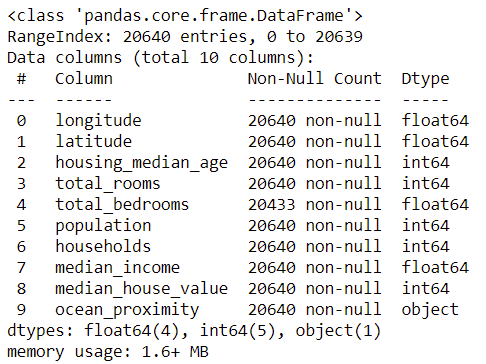

In [ ]:
# Display the descriptive statistics for all variables, including missing value counts

pd.DataFrame({'mean': ca_df.???(),
              'sd': ca_df.???(),
              'min': ca_df.???(),
              'max': ca_df.???(),
              'median': ca_df.???(),
              'length': len(ca_df),
              'miss.val': ca_df.???().sum(),
             })

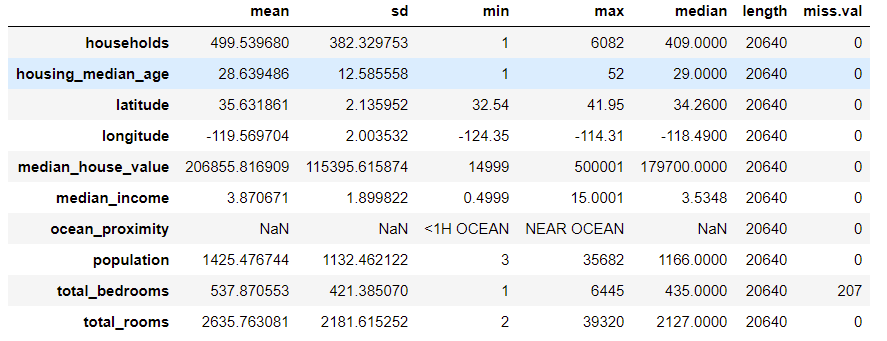

In [ ]:
# Here's one option for dealing with missing values by removing every row with a missing value

ca_df = ca_df.???()

# Display the number of samples after removing missing values

???

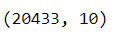

In [ ]:
# Display the number of blocks in each type of ocean_proximity

ca_df.???.???()

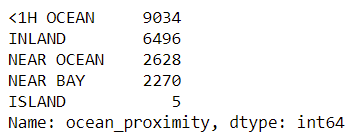

In [ ]:
# Generate a complete Exploratory Data Analysis

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

filename = ???
separator = ???

dft = AV.AutoViz(
    filename,
    sep = separator,
    depVar=???,
    dfte = ???,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=10000,
    max_cols_analyzed=30,
)

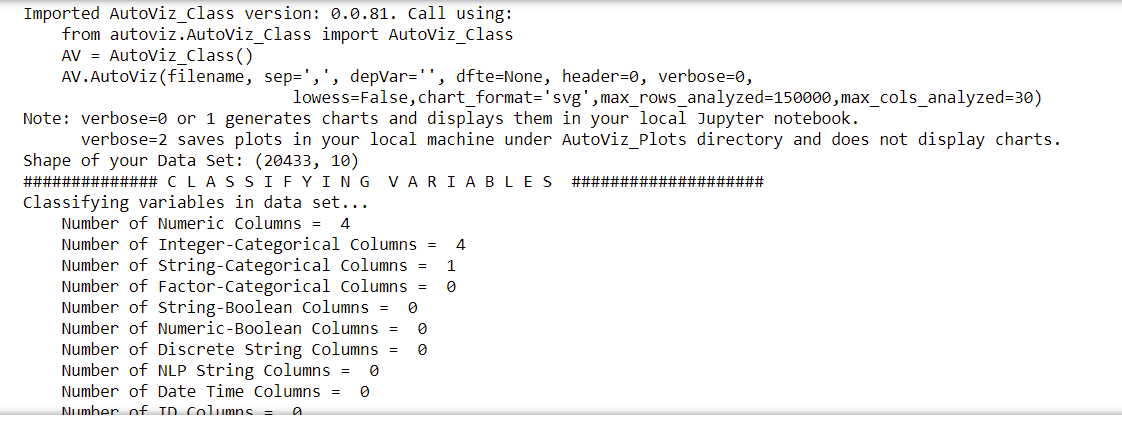

In [ ]:
# isolate predictors separate from the response variable

X = ca_df.???(columns=[???])
y = ca_df['median_house_value']

In [ ]:
# One-hot encode the categorical variables but don't alter the original X object

X_ohe = pd.get_dummies(???, prefix_sep="_", drop_first=???)

print(X_ohe.columns)

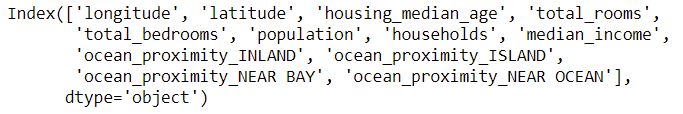

In [ ]:
# Check the number of samples and predictors

X_ohe.???

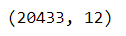

## EXPLANATORY MODEL HERE

In [ ]:
# load the linear regression algorithm into an object called "data_lm"
data_lm = ???()

# fit the linear regression algorithm object to the entire dataset, thus creating an explanatory model
explanatory_model = data_lm.???(X_ohe, ???)

In [ ]:
# print coefficients from the explanatory model
print('intercept ', explanatory_model.???)

print(pd.DataFrame({'Predictor': X_ohe.columns, 'coefficient': explanatory_model.???}))

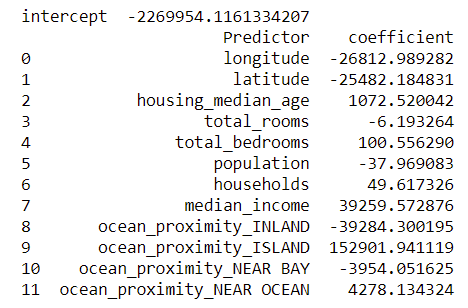

In [ ]:
# Print out the measures of model fit

pred_y = explanatory_model.???(X_ohe)

print('adjusted r2 : ', adjusted_r2_score(y, ???, explanatory_model))
print('AIC : ', AIC_score(???, pred_y, ???))
print('BIC : ', BIC_score(???, ???, ???))


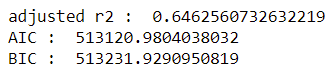

## PREDICTIVE MODEL HERE

In [ ]:
# Reload the data to return to the original dataset with missing values

ca_df = pd.read_csv('CA_housing.csv')

In [ ]:
# isolate predictors separate from the response variable

X = ca_df.drop(columns=['median_house_value'])
y = ca_df['median_house_value']

In [ ]:
# partition the data into training and test sets with 50% of the data in each

??? = train_test_split(X, y, test_size=???, random_state=1)

In [ ]:
# this algorithm encodes categorical variables as if all of them are ordinal

import category_encoders as ce

encoder = ce.CatBoostEncoder()

train_X = encoder.???(train_X, train_y)

test_X = encoder.???(test_X, test_y)

In [ ]:
# ?Here's a method we can use with predictive models after the train/test split

from sklearn.impute import KNNImputer

imputer = ???()

train_X = ???.fit_transform(???)

test_X = imputer.???(???)

In [ ]:
# Check the training samples and predictors after ordinal encoding and missing value imputation

???

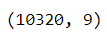

In [ ]:
# load the linear regression algorithm into an object called "data_lm"
data_lm = LinearRegression()

# fit the linear regression algorithm object to the training data, thus creating a model
model = data_lm.fit(???, ???)

In [ ]:
# print performance measures of the training data

regressionSummary(train_y, model.???(???))
print()
regressionSummary(???, ???.???(???))

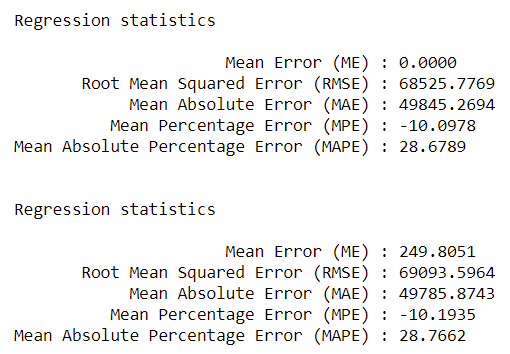

In [ ]:
# Display a histogram of the residuals to determine whether to use RMSE or MAE

%matplotlib inline

data_lm_pred = model.???(test_X)
all_residuals = test_y - ???

# Determine the percentage of datapoints with a residual in [-200000, 200000] = approx. 75\%
print(len(all_residuals[(all_residuals > -200000) & (all_residuals < 200000)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=50)

plt.tight_layout()
plt.show()

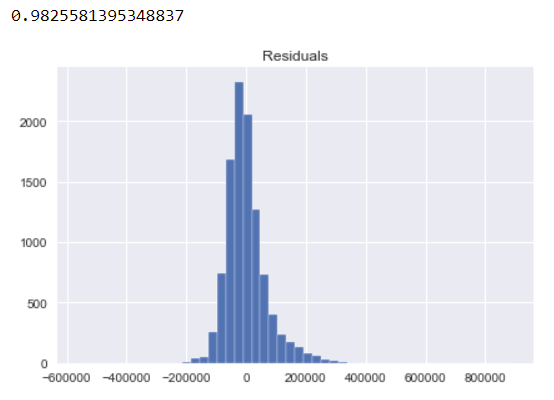

In [ ]:
# Display the descriptive statistics for the residuals

???

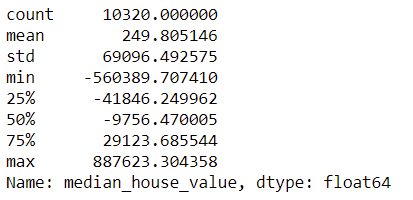

In [ ]:
# Checking residuals by sample in the test data

model_pred = model.predict(???)

result = pd.DataFrame({'Predicted': model_pred, 'Actual': test_y,
                       'Residual': ??? - model_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(test_y, model_pred)

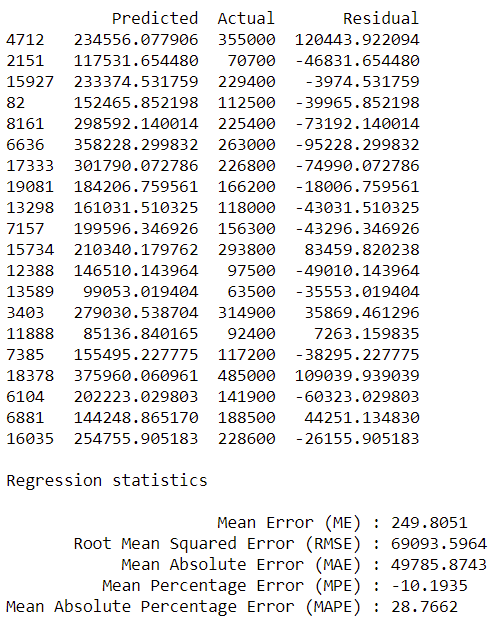

In [ ]:
# Gain and lift charts for inspecting model goodness of fit

pred_v = pd.Series(model.predict(???))

pred_v = pred_v.sort_values(ascending=False)

fig,axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Gains')
ax.set_title("Cumulative Gains Chart")

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel("Lift")

plt.tight_layout()
plt.show()

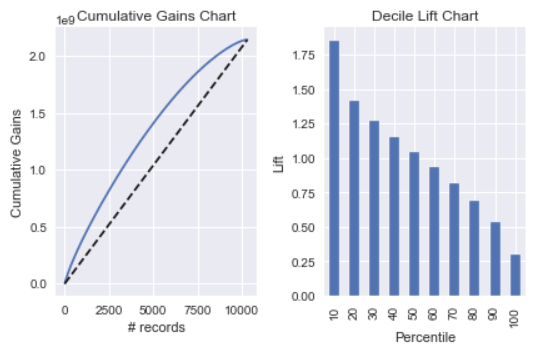